In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
potential_customers = pd.read_csv('/Users/castle/Desktop/中研院/程式/potential_customers_data.csv')

In [3]:
potential_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475843 entries, 0 to 2475842
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   u_userId              int64 
 1   u_phonePrice          int64 
 2   u_browserLifeCycle    int64 
 3   u_browserMode         int64 
 4   u_feedLifeCycle       int64 
 5   u_refreshTimes        int64 
 6   u_newsCatInterests    object
 7   u_newsCatDislike      object
 8   u_newsCatInterestsST  object
 9   u_click_ca2_news      object
 10  i_docId               object
 11  i_s_sourceId          object
 12  i_regionEntity        int64 
 13  i_cat                 int64 
 14  i_entities            object
 15  i_dislikeTimes        int64 
 16  i_upTimes             int64 
 17  i_dtype               int64 
 18  e_ch                  int64 
 19  e_m                   int64 
 20  e_po                  int64 
 21  e_pl                  int64 
 22  e_rn                  int64 
 23  e_section             int64 
 24

In [4]:
columns_to_drop = ['u_newsCatInterests', 'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news', 'i_docId', 'i_s_sourceId','i_entities']
potential_customers_2 = potential_customers.drop(columns_to_drop, axis=1)

In [5]:
potential_customers_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475843 entries, 0 to 2475842
Data columns (total 21 columns):
 #   Column              Dtype
---  ------              -----
 0   u_userId            int64
 1   u_phonePrice        int64
 2   u_browserLifeCycle  int64
 3   u_browserMode       int64
 4   u_feedLifeCycle     int64
 5   u_refreshTimes      int64
 6   i_regionEntity      int64
 7   i_cat               int64
 8   i_dislikeTimes      int64
 9   i_upTimes           int64
 10  i_dtype             int64
 11  e_ch                int64
 12  e_m                 int64
 13  e_po                int64
 14  e_pl                int64
 15  e_rn                int64
 16  e_section           int64
 17  e_et                int64
 18  label               int64
 19  cillabel            int64
 20  pro                 int64
dtypes: int64(21)
memory usage: 396.7 MB


In [6]:
potential_customers_2.nunique()

u_userId              65297
u_phonePrice              7
u_browserLifeCycle        8
u_browserMode             8
u_feedLifeCycle           8
u_refreshTimes           10
i_regionEntity          374
i_cat                   208
i_dislikeTimes           10
i_upTimes                10
i_dtype                   5
e_ch                     19
e_m                     256
e_po                     27
e_pl                   3011
e_rn                     99
e_section                 2
e_et                   3653
label                     2
cillabel                  2
pro                      82
dtype: int64

In [7]:
# 將 e_et 欄位轉換為日期時間格式
potential_customers_2['e_et'] = pd.to_datetime(potential_customers_2['e_et'], format='%Y%m%d%H%M')
potential_customers_2['e_et'].describe()

/var/folders/06/9_bpqdqs2v3cnl8l1lfqkvc00000gn/T/ipykernel_29263/3213524915.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  potential_customers_2['e_et'].describe()


count                 2475843
unique                   3653
top       2022-06-07 22:14:00
freq                     2573
first     2022-06-03 00:11:00
last      2022-06-09 23:29:00
Name: e_et, dtype: object

In [8]:
potential_customers_2['e_et'].head(50)

0    2022-06-08 19:20:00
1    2022-06-08 19:19:00
2    2022-06-08 13:19:00
3    2022-06-08 13:19:00
4    2022-06-08 19:19:00
5    2022-06-08 13:19:00
6    2022-06-08 13:19:00
7    2022-06-08 19:20:00
8    2022-06-08 13:19:00
9    2022-06-08 13:19:00
10   2022-06-08 19:20:00
11   2022-06-08 13:18:00
12   2022-06-08 13:19:00
13   2022-06-08 13:19:00
14   2022-06-08 19:20:00
15   2022-06-08 19:19:00
16   2022-06-08 19:19:00
17   2022-06-08 19:19:00
18   2022-06-08 23:25:00
19   2022-06-08 23:24:00
20   2022-06-08 23:28:00
21   2022-06-08 16:09:00
22   2022-06-08 11:27:00
23   2022-06-08 11:19:00
24   2022-06-08 08:22:00
25   2022-06-08 16:18:00
26   2022-06-08 11:27:00
27   2022-06-08 08:23:00
28   2022-06-08 11:27:00
29   2022-06-08 08:17:00
30   2022-06-08 08:23:00
31   2022-06-08 11:26:00
32   2022-06-08 07:19:00
33   2022-06-08 07:20:00
34   2022-06-08 07:18:00
35   2022-06-08 08:28:00
36   2022-06-08 07:20:00
37   2022-06-08 07:18:00
38   2022-06-08 08:28:00
39   2022-06-08 07:18:00


In [10]:
potential_customers_2['hour'] = potential_customers_2['e_et'].dt.hour
potential_customers_2['minute'] = potential_customers_2['e_et'].dt.minute
potential_customers_2['day'] = potential_customers_2['e_et'].dt.day

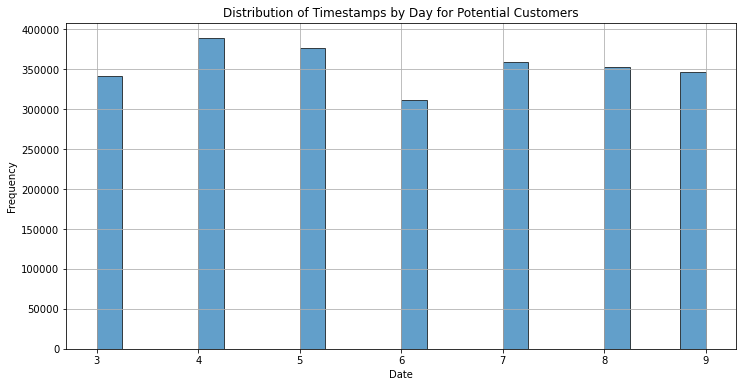

In [11]:
# 繪製日分佈的曲線圖
plt.figure(figsize=(12, 6))
plt.hist(potential_customers_2['day'], bins=24, alpha=0.7, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Day for Potential Customers')
plt.grid(True)
plt.show()

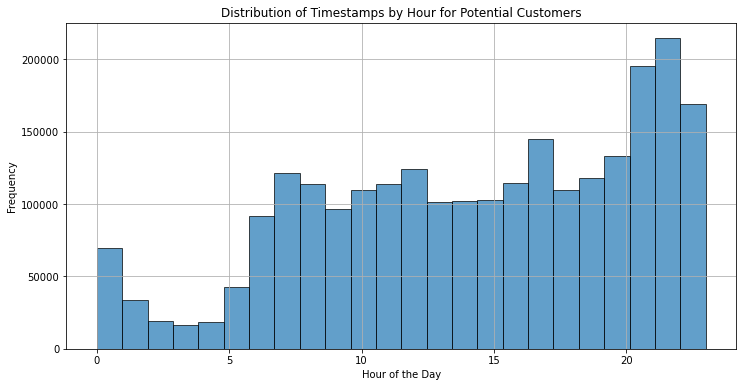

In [14]:
# 繪製日小時分佈的曲線圖
plt.figure(figsize=(12, 6))
plt.hist(potential_customers_2['hour'], bins=24, alpha=0.7, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Hour for Potential Customers')
plt.grid(True)
plt.show()


In [18]:
# 計算 unique 值和頻率
minute_counts = potential_customers_2['minute'].value_counts().sort_index()
print(minute_counts)

0        643
1        944
2       1423
3       1907
4       1929
5       2782
6       3091
7       3134
8       3717
9       4425
10      6315
11      9089
12     15853
13     34990
14     46384
15     49855
16     55530
17     60609
18     90027
19    188078
20    232301
21    228967
22    224864
23    212610
24    204935
25    200981
26    196192
27    191308
28    156796
29     46045
59       119
Name: minute, dtype: int64


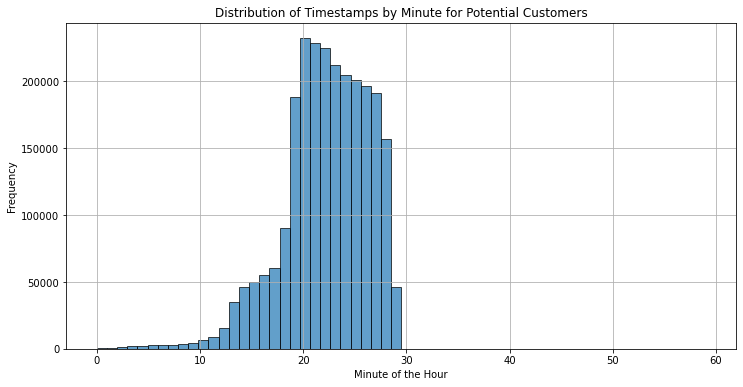

In [15]:
# 繪製分鐘分佈的曲線圖
plt.figure(figsize=(12, 6))
plt.hist(potential_customers_2['minute'], bins=60, alpha=0.7,  edgecolor='black')
plt.xlabel('Minute of the Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Minute for Potential Customers')
plt.grid(True)
plt.show()

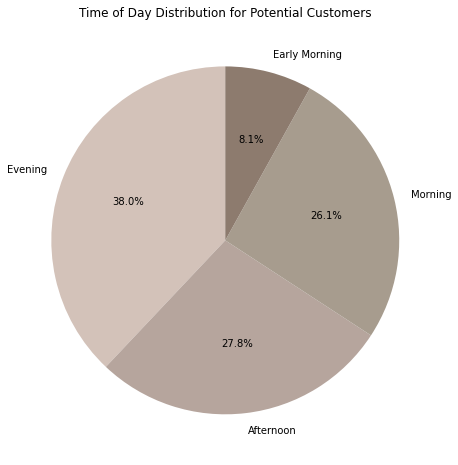

In [17]:
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# 時間段分組
potential_customers_2['time_of_day'] = potential_customers_2['hour'].apply(time_of_day)
time_of_day_counts = potential_customers_2['time_of_day'].value_counts()

# 繪製圓餅圖
colors = ['#D3C2B9', '#B6A59D', '#A79C8E', '#8D7B6E']
plt.figure(figsize=(8, 8))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Time of Day Distribution for Potential Customers')
plt.show()

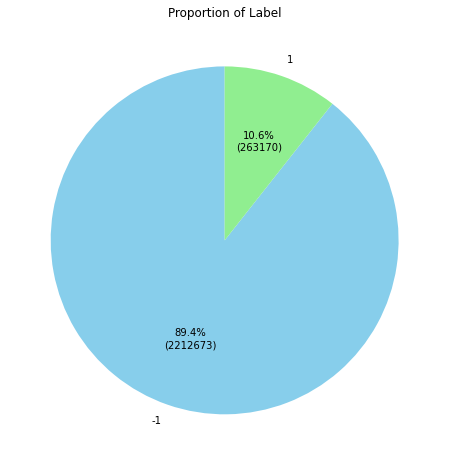

In [19]:
label_counts=potential_customers_2['label'].value_counts()
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format
# 繪製圓餅圖
plt.figure(figsize=(8, 8))
label_counts.plot.pie(autopct=autopct_format(label_counts), startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Label')
plt.ylabel('')
plt.show()

In [24]:
# 按 user_id 和 e_et 排序
potential_customers_6 = potential_customers_2.sort_values(by=['u_userId', 'e_et'])

# 計算每個 user_id 最早和最晚 e_et 之間的時間差
time_spent = potential_customers_6.groupby('u_userId')['e_et'].agg(['min', 'max'])
time_spent['time_diff'] = (time_spent['max'] - time_spent['min']).dt.total_seconds() / 60  # 轉換為分鐘

In [26]:
time_spent['time_diff'].value_counts()

0.0       8347
1.0       1557
2.0        797
3.0        530
4.0        451
          ... 
7061.0       1
8116.0       1
1581.0       1
2031.0       1
4545.0       1
Name: time_diff, Length: 5771, dtype: int64

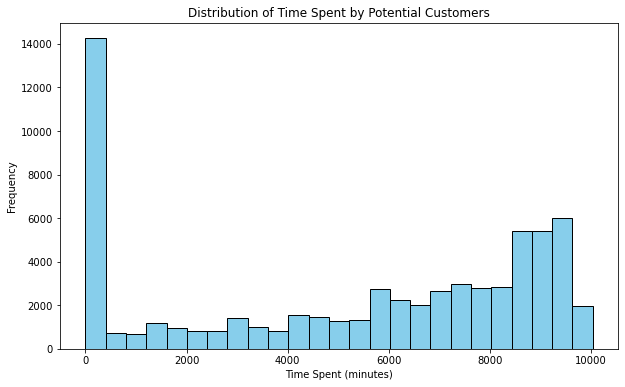

In [23]:
# 繪製時間長度的分佈直方圖
plt.figure(figsize=(10, 6))
plt.hist(time_spent['time_diff'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent by Potential Customers')
plt.show()

In [27]:
# ads_df資料集
ads_df = pd.read_csv('/Users/castle/Desktop/中研院/Data/train/train_data_ads.csv')

In [28]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675517 entries, 0 to 7675516
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   log_id                int64  
 1   label                 int64  
 2   user_id               int64  
 3   age                   int64  
 4   gender                int64  
 5   residence             int64  
 6   city                  int64  
 7   city_rank             int64  
 8   series_dev            int64  
 9   series_group          int64  
 10  emui_dev              int64  
 11  device_name           int64  
 12  device_size           int64  
 13  net_type              int64  
 14  task_id               int64  
 15  adv_id                int64  
 16  creat_type_cd         int64  
 17  adv_prim_id           int64  
 18  inter_type_cd         int64  
 19  slot_id               int64  
 20  site_id               int64  
 21  spread_app_id         int64  
 22  hispace_app_tags      int64  
 23  app_sec

In [29]:
ads_df['pt_d'] = pd.to_datetime(ads_df['pt_d'], format='%Y%m%d%H%M')

ads_df['pt_d'].describe()

/var/folders/06/9_bpqdqs2v3cnl8l1lfqkvc00000gn/T/ipykernel_29263/3614055076.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ads_df['pt_d'].describe()


count                 7675517
unique                   5436
top       2022-06-03 10:27:00
freq                     2550
first     2022-06-02 01:23:00
last      2022-06-10 12:09:00
Name: pt_d, dtype: object

In [35]:
ads_df['pt_d'].head(100)

0    2022-06-03 03:26:00
1    2022-06-03 03:26:00
2    2022-06-03 03:26:00
3    2022-06-03 03:26:00
4    2022-06-03 03:28:00
             ...        
95   2022-06-03 11:36:00
96   2022-06-03 08:23:00
97   2022-06-03 11:37:00
98   2022-06-03 10:15:00
99   2022-06-03 10:21:00
Name: pt_d, Length: 100, dtype: datetime64[ns]

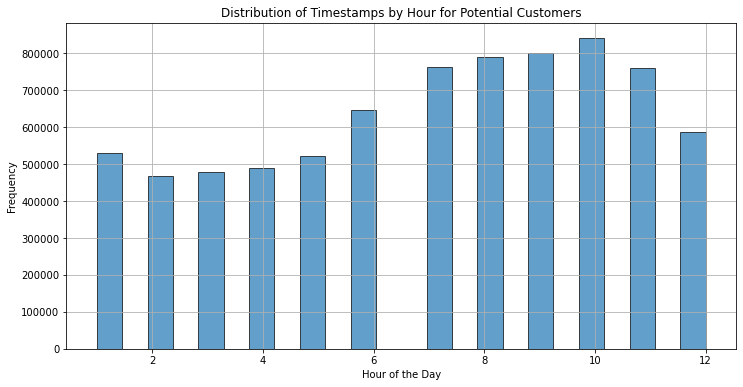

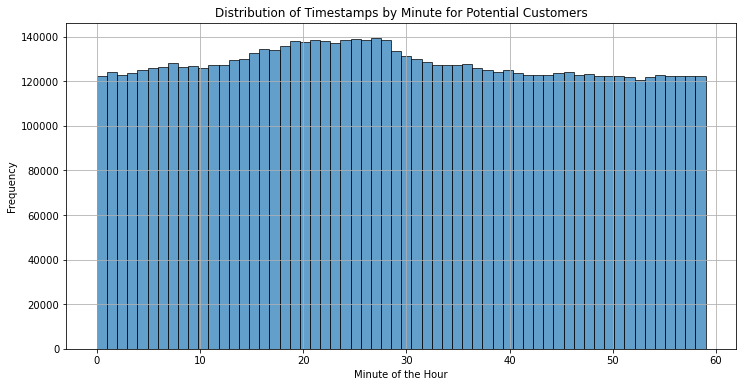

In [32]:
ads_df['hour'] = ads_df['pt_d'].dt.hour
ads_df['minute'] = ads_df['pt_d'].dt.minute

plt.figure(figsize=(12, 6))
plt.hist(ads_df['hour'], bins=24, alpha=0.7, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Hour for Potential Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(ads_df['minute'], bins=60, alpha=0.7,  edgecolor='black')
plt.xlabel('Minute of the Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Minute for Potential Customers')
plt.grid(True)
plt.show()

In [44]:
ads_df['day'] = ads_df['pt_d'].dt.day

day_counts = ads_df['day'].value_counts().sort_index()

print(day_counts)

2        1646
3     1171239
4     1176466
5     1137323
6      995948
7     1134083
8     1055571
9      998276
10       4965
Name: day, dtype: int64


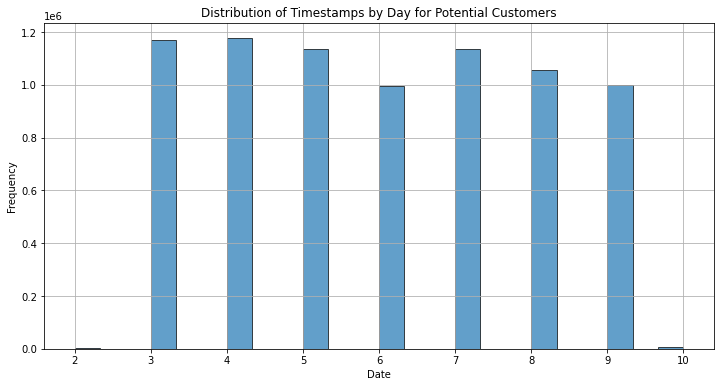

In [48]:
# 繪製日分佈的曲線圖
plt.figure(figsize=(12, 6))
plt.hist(ads_df['day'], bins=24, alpha=0.7, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Day for Potential Customers')
plt.grid(True)
plt.show()

In [34]:
ads_df['hour'].value_counts()

10    840754
9     799564
8     791120
7     761604
11    759454
6     647287
12    587932
1     529335
5     522539
4     488432
3     479122
2     468374
Name: hour, dtype: int64

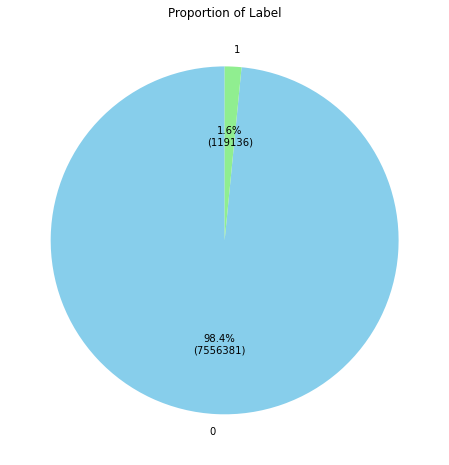

In [36]:
label_counts=ads_df['label'].value_counts()
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format
# 繪製圓餅圖
plt.figure(figsize=(8, 8))
label_counts.plot.pie(autopct=autopct_format(label_counts), startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Label')
plt.ylabel('')
plt.show()

In [37]:
ads_df['label'].value_counts()

0    7556381
1     119136
Name: label, dtype: int64

In [38]:
# 按 user_id 和 pt_d 排序
ads_df2 = ads_df.sort_values(by=['user_id', 'pt_d'])

# 計算每個 user_id 最早和最晚 pt_d 之間的時間差
time_spent = ads_df2.groupby('user_id')['pt_d'].agg(['min', 'max'])
time_spent['time_diff'] = (time_spent['max'] - time_spent['min']).dt.total_seconds() / 60  # 轉換為分鐘

In [39]:
time_spent['time_diff'].value_counts()

0.0       2037
1.0        746
2.0        547
3.0        413
5.0        374
          ... 
6717.0       1
7068.0       1
9988.0       1
6940.0       1
5425.0       1
Name: time_diff, Length: 7922, dtype: int64

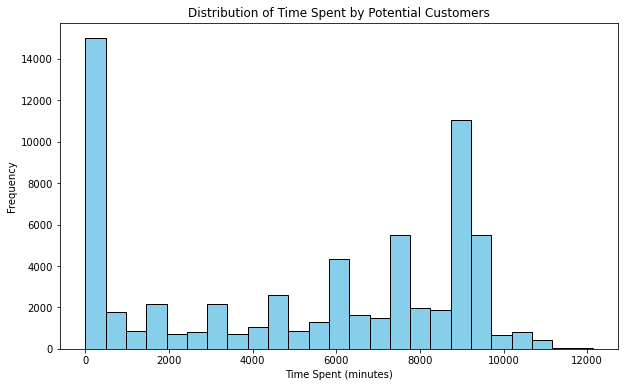

In [43]:
# 繪製時間長度的分佈直方圖
plt.figure(figsize=(10, 6))
plt.hist(time_spent['time_diff'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent by Potential Customers')
plt.show()